#### OOD GANS Walkthrough

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from config import *
from dataset import MNIST,CIFAR10, MNIST_SUB
from models.mnist_cnn import MNISTCNN
from models.hparam import HParam
from models.gans import *
from models.dc_gan_model import *
from utils import *
# from trainer import train # Not needed for OOD GANS

# import autoreload code
# %load_ext autoreload
# %autoreload 2

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


### Dataset Processing


In [4]:
mnist_tri_set, mnist_val_set, mnist_tri_loader, mnist_val_loader = MNIST(128, 32, 2, True)
cifar_tri_set, cifar_val_set , cifar_tri_loader, cifar_val_loader = CIFAR10(128, 32)
# USE MNIST SUBSAMPLES
ind_idx = [0,2,3,6,8]
ood_idx = [1,7]
mnist_dset_dict = MNIST_SUB(batch_size=128, val_batch_size=64, idx_ind=ind_idx, idx_ood=ood_idx, shuffle=True)
# TODO: Show dataset statistics and sample images.

Files already downloaded and verified
Files already downloaded and verified


### Original GANS Implementation

In [ ]:
D = discriminator(gan_type=GAN_TYPE.NAIVE).to(DEVICE)
G = generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, gan_type=GAN_TYPE.NAIVE)

### Original Deep Convolutional GAN Implementation

In [ ]:
D = dc_discriminator().to(DEVICE)
G = dc_generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, gan_type=GAN_TYPE.NAIVE)

### OOD GAN Sample Training with Logger



Iter: 0, D: 0.8443, G:0.2941


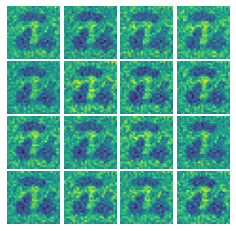

In [7]:
# TODO: Launch this on Google Colab
D = discriminator(gan_type=GAN_TYPE.OOD).to(DEVICE)
G = generator().to(DEVICE)
# Training with Loss Tracker (for debugging)
logger = Logger(10000)

g_d_steps_ratios = 2
logger_max_iter = 2500
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
ind_train_loader = mnist_dset_dict['train_set_ind_loader']
ood_train_loader = mnist_dset_dict['train_set_ood_loader']
gan_trainer(ind_train_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, g_d_ratio=g_d_steps_ratios,
            gan_type=GAN_TYPE.OOD, show_every=100,ood_loader=ood_train_loader,logger=logger, 
            logger_max_iter=logger_max_iter)
# gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
#             discriminator_loss, generator_loss,
#             gan_type=GAN_TYPE.OOD, ood_img_sample=CIFAR10,gd_ls_tracker=GDlsTracker, 
#             gd_ls_track_iter=1000)

ic| 'The total loss of G and D can be accessed now.'


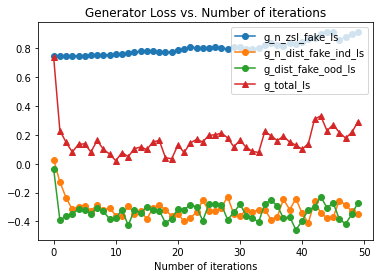

ic| 'The total loss of G and D can be accessed now.'


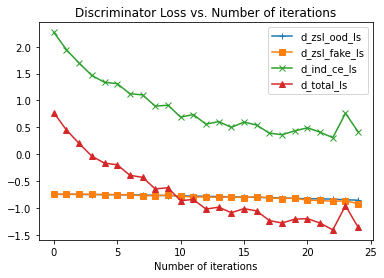

In [6]:
from utils import *
logger.plt_ls(save_fname='g_loss_mnist', num_iter=logger_max_iter*g_d_steps_ratios, type=GD.G)
logger.plt_ls(save_fname='d_loss_mnist', num_iter=logger_max_iter, type=GD.D)